In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 


In [3]:
df=pd.read_csv("/kaggle/input/udemy-courses-dataset/UdemyCoursesDataset.csv")
df

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance


In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [13]:
df.describe()


,course_id,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182
std,3.436355e+05,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000
50%,6.885580e+05,911.500000,18.000000,25.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


In [12]:
df.describe(include='object')

,course_title,price,level,content_duration,published_timestamp,subject
count,3682,3682,3682,3682,3682,3682
unique,3667,38,4,109,3676,4
top,Acoustic Blues Guitar Lessons,20,All Levels,1 hour,2014-04-15T21:48:55Z,Web Development
freq,3,830,1932,607,2,1200


In [15]:
# df.head()
df.tail()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance
3681,964478,Zombie Apocalypse Photoshop Actions,True,50,12,1,15,All Levels,1.5 hours,2016-09-26T22:19:48Z,Graphic Design


In [18]:
df.subject.unique()

array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

In [19]:
df.subject.value_counts()

subject
Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

In [26]:
df[df.is_paid==False]


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
41,286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23T05:08:14Z,Musical Instruments
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,Musical Instruments
57,955914,A beginner`s guide to fingerpicking and strumm...,False,Free,3481,29,20,Beginner Level,2 hours,2016-09-13T21:51:59Z,Musical Instruments
67,270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10T20:19:10Z,Web Development
74,1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,False,Free,338,7,6,Beginner Level,1 hour,2017-05-30T14:30:12Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
3620,552598,WordPress in under an hour - Create/manage you...,False,Free,6474,86,15,All Levels,1 hour,2015-07-15T00:21:56Z,Web Development
3638,1068590,Wordpress Website Mastery 2017,False,Free,5181,64,22,Beginner Level,2.5 hours,2017-01-18T17:01:40Z,Web Development
3652,752706,Write quicker HTML5 and CSS 3; productivity ha...,False,Free,13016,286,15,All Levels,1.5 hours,2016-03-03T17:45:31Z,Web Development
3674,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,Free,924,4,18,Beginner Level,1 hour,2017-06-29T00:29:36Z,Musical Instruments


In [28]:
df.sort_values('num_subscribers' , ascending=False)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,Web Development
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09T15:51:55Z,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08T16:21:30Z,Web Development
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08T22:28:36Z,Web Development
...,...,...,...,...,...,...,...,...,...,...,...
2290,1223240,Learn Pirates of the Caribbean by Ear on the P...,True,20,0,0,6,All Levels,32 mins,2017-05-22T17:14:43Z,Musical Instruments
1267,1258666,Financial Statement Auditing Cycles,True,50,0,0,9,Intermediate Level,2 hours,2017-06-29T23:20:10Z,Business Finance
2070,1215926,Kickstarter success in 5 easy steps,True,20,0,0,12,All Levels,31 mins,2017-05-16T14:55:28Z,Business Finance
1931,1247992,Introduction to Project Management for Finance...,True,50,0,0,9,Beginner Level,2 hours,2017-07-03T21:40:32Z,Business Finance


In [29]:
df.sort_values('num_subscribers' )

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
649,1233314,Building a Balanced Scorecard,True,50,0,0,11,Intermediate Level,2 hours,2017-07-03T21:38:22Z,Business Finance
3259,1232282,The Cash Flow Statement - An Introduction,True,50,0,0,10,Beginner Level,1.5 hours,2017-06-28T16:05:51Z,Business Finance
3261,1275872,The Complete Adobe Spark Course,True,150,0,0,29,All Levels,2 hours,2017-07-03T17:39:57Z,Graphic Design
910,726314,Create Beautiful Image Maps for Your Website,True,20,0,0,8,Intermediate Level,37 mins,2016-01-18T17:56:36Z,Graphic Design
3328,715476,The Cuckoo Strategy to get European Funding,True,160,0,0,6,All Levels,1 hour,2016-01-06T02:38:23Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08T22:28:36Z,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08T16:21:30Z,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09T15:51:55Z,Web Development


In [37]:
df[(df.subject=='Graphic Design')]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
8,206592,:::Beginners Guide To Creating Amazing Images ...,True,25,72,5,17,Beginner Level,1 hour,2014-04-29T19:50:31Z,Graphic Design
20,1165268,15 Motion Graphic Elements in After Effect (S...,True,30,8,0,20,Intermediate Level,3 hours,2017-04-11T04:27:34Z,Graphic Design
35,1164876,3DS MAX - Learn 3Ds MAX tutorial for Beginners...,True,20,785,2,29,All Levels,4.5 hours,2017-04-18T16:45:59Z,Graphic Design
39,599652,48 Logo Designs and Techniques,True,20,113,9,48,All Levels,9 hours,2015-09-15T00:23:14Z,Graphic Design
47,1269190,7 Secrets To Designing In Black and White,True,100,1000,1,12,All Levels,1.5 hours,2017-06-27T19:55:18Z,Graphic Design
...,...,...,...,...,...,...,...,...,...,...,...
3588,1131780,"Whiteboard Animation, Beginner To Expert - In ...",True,20,1343,25,16,All Levels,1 hour,2017-03-14T20:52:30Z,Graphic Design
3594,908664,Word Swag : Create Stunning Images with the Wo...,True,100,2416,19,14,All Levels,1 hour,2016-08-09T17:56:53Z,Graphic Design
3639,1122306,Wordpress: Comment utiliser le thème FABLE,True,20,1,0,10,Beginner Level,39 mins,2017-03-07T16:53:27Z,Graphic Design
3671,144222,"YOU can Draw, Shade and Paint a Mixed Media Gi...",True,30,1249,44,19,Beginner Level,3 hours,2014-01-28T02:30:26Z,Graphic Design


In [39]:
df[df.course_title.str.contains('Python')]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
216,599504,Advanced Scalable Python Web Development Using...,True,120,1299,56,71,Intermediate Level,14 hours,2016-08-11T22:09:24Z,Web Development
777,47963,"Coding for Entrepreneurs: Learn Python, Django...",True,195,23412,799,251,All Levels,45 hours,2013-04-08T00:46:14Z,Web Development
814,631128,Complete Python Web Course: Build 8 Python Web...,True,110,7489,941,173,All Levels,16 hours,2015-11-08T20:57:35Z,Web Development
842,186096,"Core: A Web App Reference Guide for Django, Py...",True,195,2497,98,154,All Levels,26 hours,2014-05-29T00:58:43Z,Web Development
1400,394832,Fun and creative web engineering with Python a...,False,Free,10917,319,25,All Levels,2 hours,2015-06-09T19:51:50Z,Web Development
1932,1038538,Introduction to QGIS Python Programming,True,85,197,26,28,Beginner Level,3.5 hours,2016-12-22T00:11:22Z,Web Development
1969,902888,Investment Portfolio Analysis with Python,True,50,209,13,37,All Levels,7 hours,2016-07-13T21:40:32Z,Business Finance
2294,391546,Learn Python and Django: Payment Processing,True,70,17714,198,23,All Levels,3.5 hours,2015-02-09T15:37:56Z,Web Development
2295,1063722,Learn Python Django - A Hands-On Course,True,50,1339,21,18,Beginner Level,2 hours,2017-01-18T21:53:34Z,Web Development
2341,546848,Learn to code in Python and learn Adobe Photos...,True,50,1132,1,29,All Levels,2 hours,2015-07-08T00:15:12Z,Graphic Design


In [40]:
df.dtypes

course_id               int64
course_title           object
is_paid                  bool
price                  object
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
dtype: object

In [43]:
df.published_timestamp=pd.to_datetime(df.published_timestamp)

In [44]:
df.dtypes

course_id                            int64
course_title                        object
is_paid                               bool
price                               object
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                    object
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [47]:
df['year']=df.published_timestamp.dt.year

In [48]:
df[df.year==2015]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
10,591880,1 - Concepts of Statistics For Beginners Step ...,True,200,273,4,15,Beginner Level,31 mins,2015-08-30 22:48:34+00:00,Business Finance,2015
16,302450,10 Numbers Every Business Owner Should Know,True,20,13,1,9,All Levels,1 hour,2015-03-08 19:11:24+00:00,Business Finance,2015
19,384928,101 Blues riffs - learn how the harmonica supe...,True,200,1350,65,55,Intermediate Level,6.5 hours,2015-01-04 21:14:31+00:00,Musical Instruments,2015
23,550842,16 Guitar Chords to Jam With - (Beginner - Int...,True,20,1224,19,20,Beginner Level,1 hour,2015-07-10 19:53:56+00:00,Musical Instruments,2015
26,486240,2 Easy Steps To Investment And Avoiding Traps,True,20,828,1,20,All Levels,1 hour,2015-04-27 23:18:59+00:00,Business Finance,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,551170,Your First Course on Piano,True,70,2002,34,33,Beginner Level,4 hours,2015-07-16 17:07:49+00:00,Musical Instruments,2015
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26 20:48:48+00:00,Business Finance,2015
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20 22:15:17+00:00,Web Development,2015
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26 20:04:21+00:00,Musical Instruments,2015


In [50]:
df[df.subject.isin(['Web Development','Graphic Design'])]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
8,206592,:::Beginners Guide To Creating Amazing Images ...,True,25,72,5,17,Beginner Level,1 hour,2014-04-29 19:50:31+00:00,Graphic Design,2014
11,64605,1 Hour CSS,True,100,18324,333,16,Beginner Level,1 hour,2013-07-09 20:27:14+00:00,Web Development,2013
12,64422,1 Hour HTML,True,200,16212,514,20,Beginner Level,1 hour,2013-07-09 03:16:26+00:00,Web Development,2013
13,63612,1 Hour JavaScript,True,200,22999,602,18,Beginner Level,1 hour,2013-07-04 15:27:02+00:00,Web Development,2013
14,72262,1 hour jQuery,True,100,5456,133,25,Beginner Level,1 hour,2013-08-03 14:20:52+00:00,Web Development,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3670,560996,You can create Incredible Websites with HTML C...,True,100,11892,50,28,All Levels,2.5 hours,2015-09-12 01:35:41+00:00,Web Development,2015
3671,144222,"YOU can Draw, Shade and Paint a Mixed Media Gi...",True,30,1249,44,19,Beginner Level,3 hours,2014-01-28 02:30:26+00:00,Graphic Design,2014
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20 22:15:17+00:00,Web Development,2015
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11 18:55:45+00:00,Web Development,2015


In [53]:
hours =df.groupby('level')[['content_duration']].max()
hours

,content_duration
level,
All Levels,9.5 hours
Beginner Level,9.5 hours
Expert Level,9 hours
Intermediate Level,9.5 hours


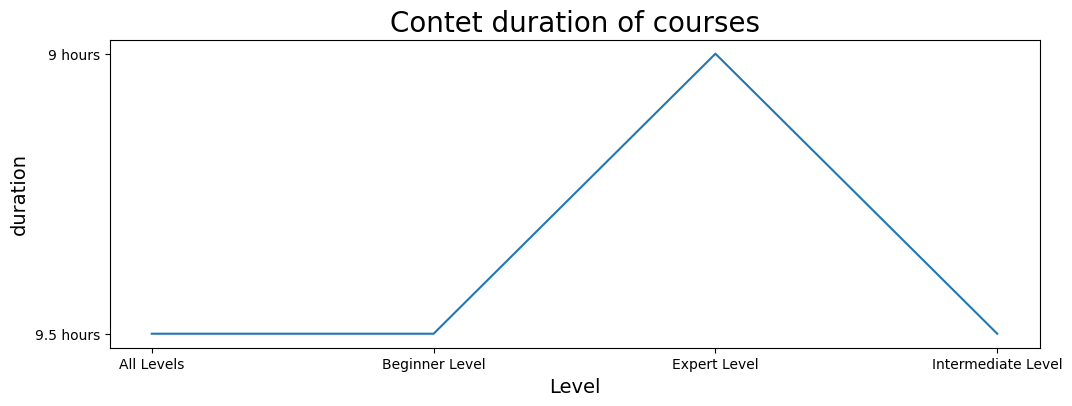

In [101]:
plt.figure(figsize=(12,4))
plt.plot(hours.index,hours['content_duration'])
plt.title('Contet duration of courses',fontsize=20)
plt.xlabel('Level',fontsize=14)
plt.ylabel('duration',fontsize=14)
plt.show()

Text(0.5, 1.0, 'Number of Courses per Subject')

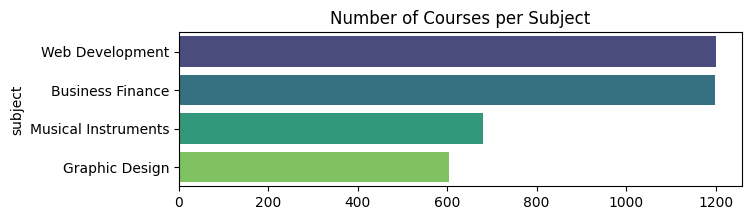

In [84]:
subject_counts = df['subject'].value_counts()
plt.figure(figsize=(16,2))
plt.subplot(1, 2, 1)
sns.barplot(x=subject_counts.values, y=subject_counts.index, palette='viridis')
plt.title('Number of Courses per Subject')

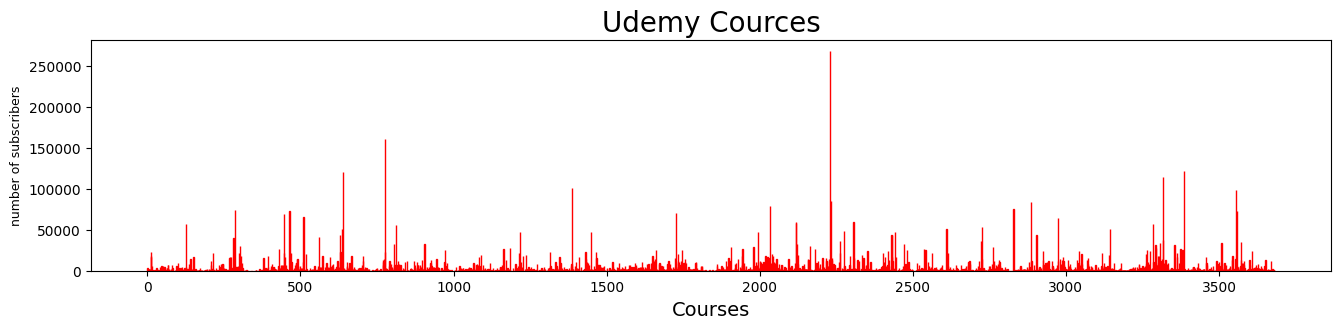

In [98]:
plt.figure(figsize=(16,3))
plt.bar(df.index, df.num_subscribers,ec='r')
plt.title('Udemy Cources', fontsize=20)
plt.xlabel('Courses',fontsize=14)
plt.ylabel('number of subscribers', fontsize=9)
plt.show()

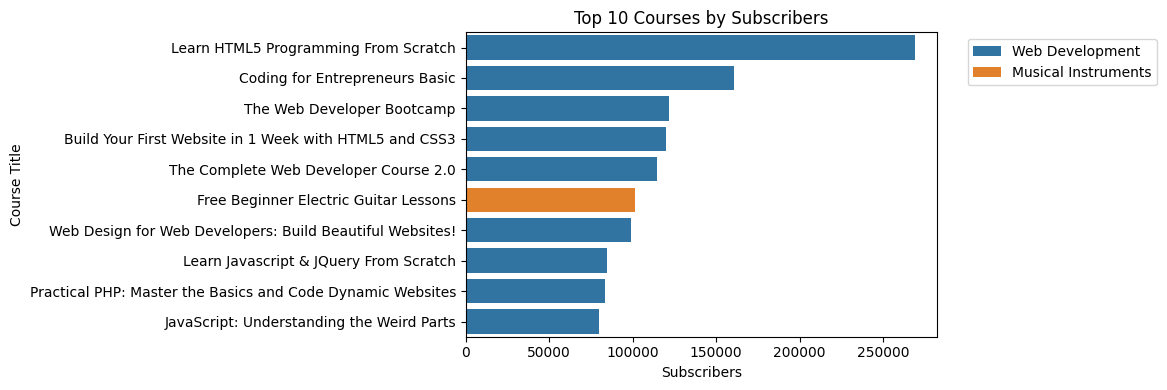

In [97]:
top10 = df.nlargest(10, 'num_subscribers')[['course_title', 'num_subscribers', 'subject']]

plt.figure(figsize=(12, 4))
sns.barplot(x='num_subscribers', y='course_title', data=top10, hue='subject', dodge=False)
plt.title('Top 10 Courses by Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Course Title')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [128]:
prices = df.groupby(['course_id', 'course_title'])[['price']].max().reset_index()
prices

,course_id,course_title,price
0,8324,Javascript for Beginners,20
1,8325,HTML Tutorial: HTML & CSS for Beginners,20
2,11153,Learn jQuery: An In-depth Course For Beginners,50
3,11174,Become a Web Developer from Scratch,120
4,11475,Become a Certified Web Developer,100
...,...,...,...
3671,1276020,Photoshop para iniciante - o básico,30
3672,1276182,Options Trading Foundation: Your journey to co...,95
3673,1276364,Bitcoin & Ethereum Course (2 Course Bundle),200
3674,1277924,Angular 4 Front To Back,40


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


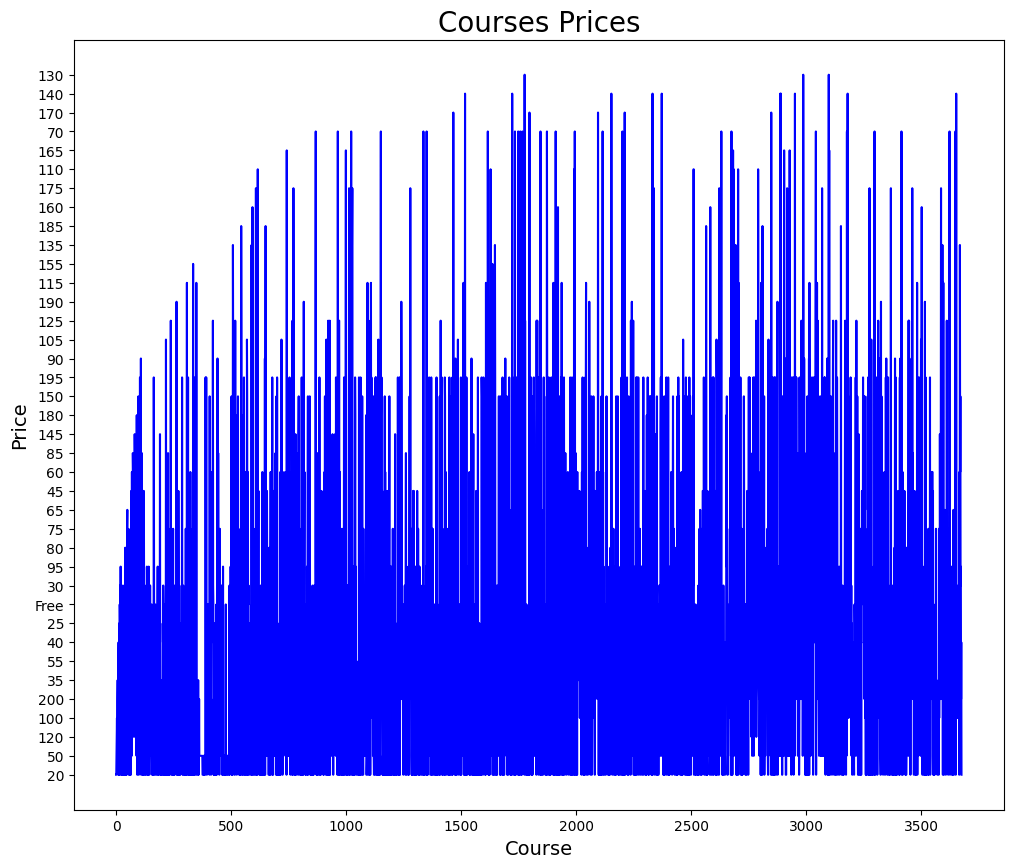

In [129]:
plt.figure(figsize=(12,10))
sns.lineplot(x=prices.index, y=prices['price'], color='blue')
plt.gca().invert_yaxis()

plt.title('Courses Prices', fontsize=20)
plt.xlabel('Course', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

/tmp/ipykernel_35/4164939383.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_lectures'],bins=500)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

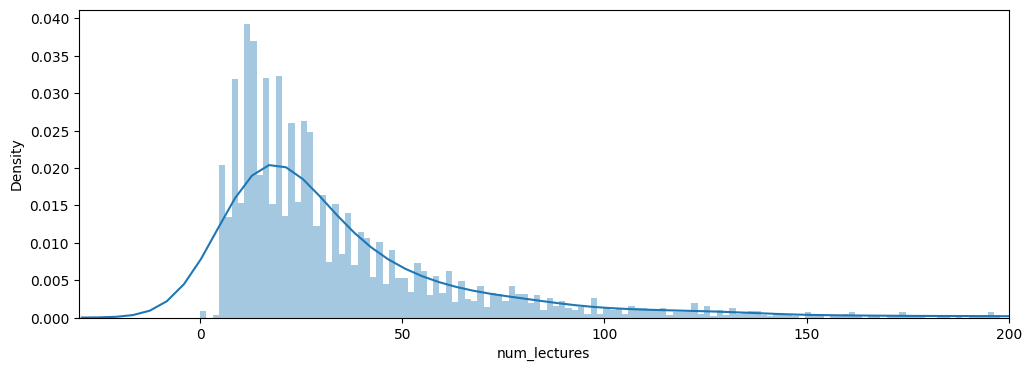

In [134]:
plt.figure(figsize=(12,4))
sns.distplot(df['num_lectures'],bins=500)
plt.xlim((-30,200))
plt.show
